# 데이터마이닝 3주차

## Regression Tree
+ 장점
    - 결과를 이해하거나 설명하기 무척 쉬움*
    - Non-parametric methods
    - Outlier에 민감하지 않음  

In [17]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# set params(figure size, font size)
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=13)

## 1. Example : 1D Regression
+ $X_1$ : 200 random number [0,5]
+ $y = sin(X_1) + sin(6X_1) + \epsilon$

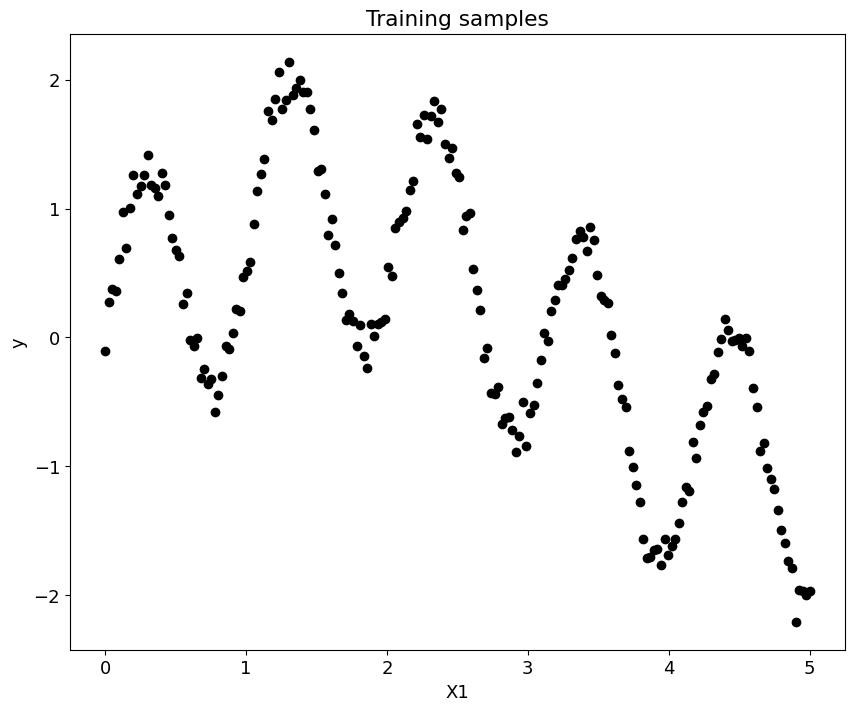

In [19]:
# create a non-linear regression sample
rng = np.random.RandomState(123)
X = np.linspace(0, 5, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# scatter plot
plt.scatter(X, y, c="k")
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Training samples")
plt.show()

### 1.1 Regression tree
+ CART (Classification And Regression Trees)
+ Splitting criterion
    - 잔차를 줄이려는 방향으로 분기
    - sum of squared resiudals $SSR(node) = \sum^{n}_{i=1}(y_i-\hat y_i)^2$ (regression tree의 경우 $\hat y_i = \bar y$),
    - $SSR(parent) - SSR(child)$가 커지도록
    - MSE, MAE, poisson, F-statistic 등

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree # tree visualization
import sklearn
sklearn.__version__

'1.2.2'

In [21]:
# fit regression model
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=123) # criterion default : mse
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=123)

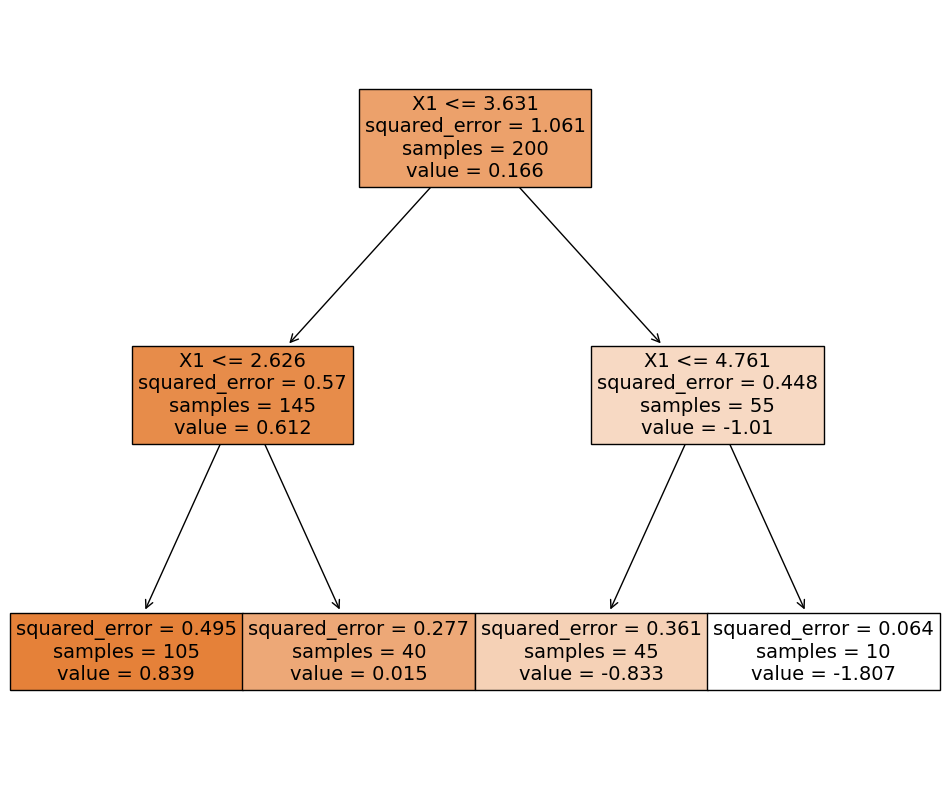

In [22]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=['X1'], filled=True)
plt.show()
# x1: 변수
# squared_error: MSE
# samples: 데이터 개수
# value: 값, value에 따라 색상 상이함

+ Remark
    - $X_1 <= 3.631$ : 분기조건
        - 왼쪽 child 노드는 해당 조건을 만족하는(true인) subset, 오른쪽 child 노드는 false인 subset
    - samples : 해당 노드에 속한 샘플들의 개수
    - value : 예측 값. 해당 노드에 속한 샘플들의 y값의 평균
    - squared_error : 실제 y와 'value' 간의 mean squared error
    - node 색깔은 value의 크기에 따라 달라짐
    
#### MSE, Predicted value
+ $MSE = \frac1n\sum^{n}_{i=1}(y_i-\hat y_i)^2$, (regression tree의 경우 $\hat y_i = \bar y$)

In [23]:
# MSE, value of the leftmost leaf node
subset_y = y[(X.ravel() <= 3.631) & (X.ravel() <= 2.626)]
value = subset_y.mean()
mse = 1/len(subset_y) * sum((subset_y - value)**2)

print(mse, value)

0.4949369054978452 0.8394006275939543


#### Predictive performance
- predicted_y : leaf 노드에 속한 샘플들의 y값의 평균

In [24]:
# predict
pred_y = reg_tree.predict(X)
pred_y[90:160]

array([ 0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 ,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 ,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.83

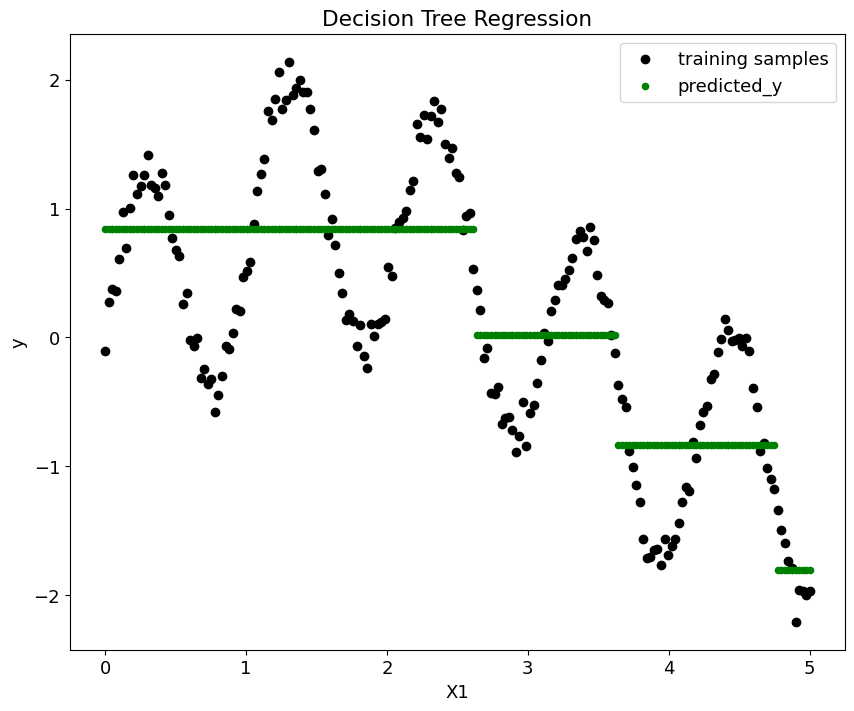

In [25]:
# plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.scatter(X, pred_y, c="g", s=20, label="predicted_y")
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [26]:
# predicitve performance
reg_tree.score(X,y) # R^2

0.6234556101867424

In [27]:
# overfitting
reg_tree = DecisionTreeRegressor(max_depth=100, random_state=123)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=100, random_state=123)

### 1.2 Model tree

- predicted_y : leaf 노드에 속한 샘플들의 y값을 선형회귀로 예측

In [28]:
!pip install --upgrade linear-tree
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression

In [29]:
# fit regression model
model_tree = LinearTreeRegressor(
    base_estimator = LinearRegression(),
    max_depth = 2)
model_tree.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=2)

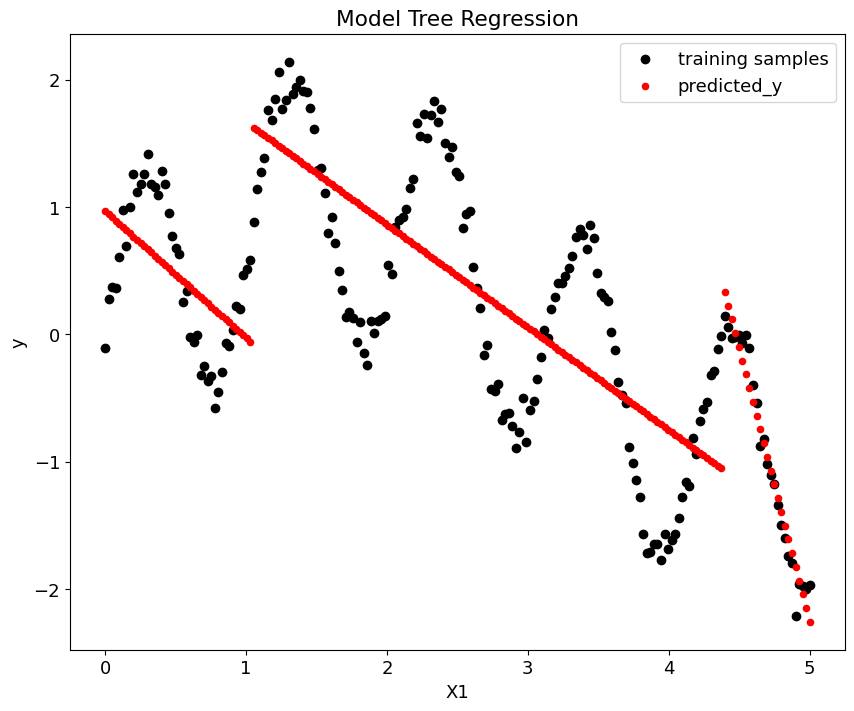

In [30]:
# predict
pred_y = model_tree.predict(X)
# plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.scatter(X, pred_y, c="r", s=20, label="predicted_y",)
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Model Tree Regression")
plt.legend()
plt.show()

In [31]:
# predicitve performance
model_tree.score(X,y) # R^2

0.6435933886019964

## 2. Decision Tree Regression with multiple variables
### 2.1 Dataset
+ Boston house prices dataset

In [32]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore') # 경고 메세지 무시
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
boston_data = load_boston()
#boston_data: `data`,`target`,`feature_names`,`DESCR`(description),`filename`
print(boston_data.DESCR[:1270])

In [ ]:
# create dataframe
df_boston = pd.DataFrame(data=boston_data.data,
                         columns= boston_data.feature_names)
df_boston['MEDV'] = boston_data.target # y
df_boston.head()

In [ ]:
# information about dataframe
df_boston.info() # float 타입으로 나와도 범주형 변수일 수 있음

In [ ]:
# check number of unique values in each column
df_boston.nunique()

In [ ]:
# check for null value
df_boston.isnull().sum()

### 2. Data Exploration
+ visualization
    - histogram
    - correlation matrix
    - pairplot(histogram & scatter plot)
    - box plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# histogram
df_boston.hist(linewidth=1.2, figsize=(12,12))
plt.show()

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# correlation
sns.heatmap(df_boston.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [ ]:
# pairplot
import seaborn as sns
sns.pairplot(df_boston[['CRIM','RM','LSTAT','MEDV']],
             plot_kws={'alpha':0.1}, diag_kws={'bins':10})
plt.show()

In [ ]:
# countplot, boxplot
fig, ax = plt.subplots(1, 2)
sns.countplot(data=df_boston, x='CHAS', ax=ax[0])
sns.boxplot(data=df_boston, x='CHAS', y='MEDV', ax=ax[1])
plt.show()

### 2.3 Model
+ CART (Classification And Regression Trees)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# splitting training/test dataset
X = df_boston.drop(columns=['MEDV'])
y = df_boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# fit regression model
reg_tree = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=123) # criterion default : mse
reg_tree.fit(X_train,y_train)

### 2.4 Tree visualization

In [ ]:
# export rules of the decision tree
features = X.columns.tolist()
print(tree.export_text(reg_tree, feature_names=features))

In [ ]:
# plot tree
plt.figure(figsize=(8,7))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()
# plt.savefig(reg_tree, dpi=300) # 저장 시 크기 조절이 잘 안됨

In [ ]:
# import python packages for tree visualization
from six import StringIO
import pydotplus
from IPython.display import Image # 불러온 image를 다룰 때 쓰임
# !pip install graphviz

In [ ]:
# visualization and save figure
# 크기 조정없이 이미지 저장 가능
dot_file = StringIO() # 문자열 데이터를 저장하는 역할

# export_graphviz : tree 시각화용
# model, feature_names, out_file - 출력할 파일
tree.export_graphviz(reg_tree, feature_names=features, out_file=dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph = pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.write_png("reg_tree1.png") # 이미지 저장

Image(graph.create_png()) # 저장하지 않아도 ipython에서 출력할 수 있음

### 2.4 Predictive Performance

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
# RMSE, MSE, R-squared
RMSE = [mean_squared_error(y, reg_tree.predict(X), squared=False),
       mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)]
MAPE = [mean_absolute_percentage_error(y, reg_tree.predict(X)),
        mean_absolute_percentage_error(y_test, reg_tree.predict(X_test))]
r2 = [r2_score(y, reg_tree.predict(X)),
      r2_score(y_test, reg_tree.predict(X_test))]

performance_summary = pd.DataFrame({
'Dataset': ['Training', 'Test'],
'RMSE': RMSE,
'MAPE': MAPE,
'R^2': r2
})
performance_summary.round(4)

In [ ]:
import numpy as np

In [ ]:
# plot
plt.scatter(y_test, reg_tree.predict(X_test), color='k', alpha=0.5)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'grey')
plt.xlabel('Observed')
plt.ylabel('Fitted')
plt.show()

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=100, random_state=123)
reg_tree.fit(X_train,y_train)

### 2.5 Overfitting
+ decision tree가 아무 제약 없이 full growing을 하면 해당 training datset에 overfitting됨
+ 해결방법
    - stopping condition으로 full tree가 되는 것을 사전에 막음  
    - 또는, full tree 생성 후 가지치기(pruning)
+ stopping conditions
    - max_depth : tree의 최대 depth. tree depth가 크면 해석하기도 힘듬
    - min_samples_split : 분기 시 노드의 최소 sample 수
    - min_samples_leaf : leaf node의 최소 sample 수
    - overfitting을 방지하면서도 적절히 분기하게끔 설정

In [ ]:
#reg_tree = DecisionTreeRegressor(max_depth=1000, min_samples_leaf=0.001, random_state=123) # 파라미터값 변경하면서 최적화 할 수 있음
reg_tree = DecisionTreeRegressor(min_samples_leaf=0.03, random_state=123)
reg_tree.fit(X_train,y_train)

RMSE = [mean_squared_error(y, reg_tree.predict(X), squared=False),
       mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)]
MAPE = [mean_absolute_percentage_error(y, reg_tree.predict(X)),
        mean_absolute_percentage_error(y_test, reg_tree.predict(X_test))]
r2 = [r2_score(y, reg_tree.predict(X)),
      r2_score(y_test, reg_tree.predict(X_test))]

performance_summary = pd.DataFrame({
'Dataset': ['Training', 'Test'],
'RMSE': RMSE,
'MAPE': MAPE,
'R^2': r2
})
performance_summary.round(4)